# Biostat 257 Homework 1

#### Due Apr 16 @ 11:59PM
**Elvis Cui** elviscuihan@g.ucla.edu

*PhD Student at Department of Biostatistics, UCLA*

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2021-spring` and add `Hua-Zhou` and `Chris-German` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (4) four space indenting rule, (6) 80 charcter rule, (7) space after comma rule, (8) no space before comma rule, (9) space around operator rule.

## Sol Q1

- Done.
- Please see https://github.com/ElvisCuiHan/biostat-257-2021-spring.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

4. Is `0 * x == 0` true for all floating-point number `x`? 

5. Is `x / a == x * (1 / a)` always true?

## Sol Q2

1.

In [1]:
x = 0.1; y = 0.1; z = 1.0

println((x + y) + z)
println(x + (y + z))
(x + y) + z == x + (y + z)

1.2
1.2000000000000002


false

**What I have found**: $(x + y) + z$ is not equal to $x + (y + z)$, and this is due to the round off of floating-point numbers.

2. No.

In [2]:
x = 1.2; y = 0.1; z = 11

println((x * y) * z, " ", x * (y * z))
(x * y) * z == x * (y * z)

1.3199999999999998 1.32


false

3. No.

In [3]:
a = 1.2; x = 1.0; y = 0.1

println(a * (x + y), " ", a * x + a * y)
a * (x + y) == a * x + a * y

1.32 1.3199999999999998


false

4. No.

In [4]:
x = Inf

println(0 * x)
0 * x == 0

NaN


false

5. No.

In [5]:
x = 1e-12; a = 1e38

println(x / a, " ", x * (1 / a))
x / a == x * (1 / a)

1.0e-50 9.999999999999999e-51


false

## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. What do you find?  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
    Explain what does macro `@fastmath` do?

In [6]:
function g(k::Number)
    for i in 1:10
        k = 5k - 1
    end
    k
end

function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

## Sol Q3
1.

In [7]:
typeof(2)

Int64

In [8]:
@code_llvm g(2)

;  @ In[6]:1 within `g'
define i64 @julia_g_1290(i64 signext %0) {
top:
;  @ In[6]:3 within `g'
; ┌ @ int.jl:88 within `*'
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-'
   %2 = add i64 %1, -2441406
; └
;  @ In[6]:5 within `g'
  ret i64 %2
}


2.

In [9]:
typeof(2.0)

Float64

In [10]:
@code_llvm g(2.0)

;  @ In[6]:1 within `g'
define double @julia_g_1323(double %0) {
top:
;  @ In[6]:3 within `g'
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %10 = fadd double %9, -1.000000e+00
; └


3. For `Int64`: no loop, 2 steps in total. For `Float64`: 10 loops, 20 steps in total.

4.

In [11]:
?@fastmath

```
@fastmath expr
```

Execute a transformed version of the expression, which calls functions that may violate strict IEEE semantics. This allows the fastest possible operation, but results are undefined – be careful when doing this, as it may change numerical results.

This sets the [LLVM Fast-Math flags](http://llvm.org/docs/LangRef.html#fast-math-flags), and corresponds to the `-ffast-math` option in clang. See [the notes on performance annotations](@ref man-performance-annotations) for more details.

# Examples

```jldoctest
julia> @fastmath 1+2
3

julia> @fastmath(sin(3))
0.1411200080598672
```


In [12]:
@code_llvm g_fastmath(2)

;  @ In[6]:8 within `g_fastmath'
define i64 @julia_g_fastmath_1538(i64 signext %0) {
top:
;  @ In[6]:10 within `g_fastmath'
; ┌ @ fastmath.jl:270 within `mul_fast'
; │┌ @ int.jl:88 within `*'
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:270 within `sub_fast'
; │┌ @ int.jl:86 within `-'
    %2 = add i64 %1, -2441406
; └└
;  @ In[6]:12 within `g_fastmath'
  ret i64 %2
}


In [13]:
@code_llvm g_fastmath(2.0)

;  @ In[6]:8 within `g_fastmath'
define double @julia_g_fastmath_1540(double %0) {
top:
;  @ In[6]:10 within `g_fastmath'
; ┌ @ fastmath.jl:267 within `mul_fast' @ fastmath.jl:167
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:267 within `sub_fast' @ fastmath.jl:166
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[6]:12 within `g_fastmath'
  ret double %2
}


`@fastmath`: It "executes a transformed version of the expression", thus avoiding unnessary loops in our case. 

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.  

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

3. Explain what you found.

## Sol Q4

In [14]:
using Plots

x = [0.988:0.001:1.012]
y1 = map.(x -> x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1, x)
y2 = map.(x -> y = (x - 1)^7, x)

1-element Vector{Vector{Float64}}:
 [-3.583180800000022e-14, -1.9487171000000122e-14, -1.0000000000000062e-14, -4.78296900000003e-15, -2.0971520000000132e-15, -8.235430000000051e-16, -2.7993600000000173e-16, -7.812500000000048e-17, -1.6384000000000103e-17, -2.1870000000000135e-18  …  2.186999999999447e-18, 1.6384000000000103e-17, 7.812499999998834e-17, 2.7993600000000173e-16, 8.235429999999137e-16, 2.0971520000000132e-15, 4.7829689999996165e-15, 1.0000000000000062e-14, 1.9487170999998743e-14, 3.583180800000022e-14]

1.

2.

Note y1 corresponds to the expansion and y2 corresponds to $(x-1)^7$.

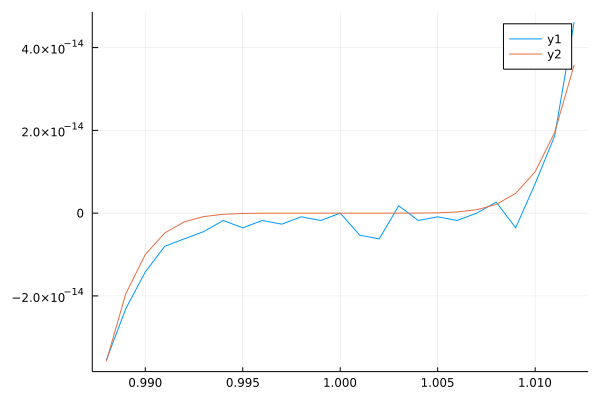

In [15]:
Plots.plot(x, [y1; y2])

3. **What I found**: $y_2=(x-1)^7$ is smooth while $y_1$ is more zigzag. The reason is many terms in the expansion is very small ($~10^{-14}$), causing rounding error of floating points.

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3.

## Sol Q5

1. **Sherman-Morrison Formula**: Direct approach.
\begin{align}
&\ \ \ \ \left(A^{-1}-\frac{1}{1+u^TA^{-1}u}A^{-1}uu^TA^{-1}\right)\left(A+uu^T\right)\\
&=I+A^{-1}uu^T-\frac{1}{1+u^TA^{-1}u}A^{-1}uu^T-\frac{1}{1+u^TA^{-1}u}A^{-1}u(u^TA^{-1}u)u^T\\
&=I+A^{-1}uu^T-\left(\frac{1+u^TA^{-1}u}{1+u^TA^{-1}u}\right)A^{-1}uu^T\\
&=I
\end{align}

2. **Woodbury Formula**: the result follows immediately by letting $B=I_m$ in *binomial inversion formula*,.

3. **Binomial Inversion Formula**: Algebraic approach.

ETS 
$$
A^{-1}=(A+UBV^T)^{-1}+A^{-1}U(B^{-1}+V^TA^{-1}U)^{-1}V^TA
$$ 

First, note that
$$
    U+UBV^TA^{-1}U=UB(B^{-1}+V^TA^{-1}U)=(A+UBV^T)A^{-1}U
$$
since $A,B$ is non-singular. Thus,
$$
    (A+UBV^T)^{-1}UB=A^{-1}U(B^{-1}+V^TA^{-1}U)^{-1}
$$
Hence,
\begin{align}
A^{-1}&=(A+UBV^T)^{-1}(A+UBV^T)A^{-1}\\
&=(A+UBV^T)^{-1}(I+UBV^TA)\\
&=(A+UBV^T)^{-1}+\left[(A+UBV^T)UB\right]V^{T}A\\
&=_{\text{see above}}(A+UBV^T)^{-1}+A^{-1}U(B^{-1}+V^TA^{-1}U)^{-1}V^TA
\end{align}

4. **Determinant Formula**

WLOG, suppose $A\in\mathbb{R}^{n\times n}$ and $U,V^T\in\mathbb{R}^{n\times m}$. Then is it enough to show

\begin{align}\tag{*}
\det|I_m+V^TA^{-1}U|=\det|I_n+A^{-1}UV^{T}|
\end{align}

Then 
$$
\det|A|\det|I_m+V^TA^{-1}U|=\det|A\left(I_n+A^{-1}UV^T\right)|=\det|A+UV^T|
$$
But (*) follows from a lemma in **Biostat 250A**:
$$
\det|I_m+AB|=\det|I_n+BA|
$$
The proof is shown below.
\begin{align}
\det|I+AB|&=\det\left|\left(\begin{matrix}I+AB&A\\
0&I\end{matrix}\right)\right|\\
&=\det\left|\left(\begin{matrix}I&A\\
-B&I\end{matrix}\right)\left(\begin{matrix}I&0\\
B&I\end{matrix}\right)\right|\\
&=\det\left|\left(\begin{matrix}I&0\\
B&I\end{matrix}\right)\left(\begin{matrix}I&A\\
-B&I\end{matrix}\right)\right|\\
&=\det\left|\left(\begin{matrix}I&A\\
0&I+BA\end{matrix}\right)\right|\\
&=\det|I+BA|
\end{align}

## Q6

Demonstrate the following facts about triangular matrices in Julia (one example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal.

## Sol Q6

In [16]:
using LinearAlgebra

1.

In [17]:
upp1 = UpperTriangular(randn(5,5))

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 -0.238221  0.322963  -0.517434  -0.61059   -0.631303
   ⋅        1.37326    0.428111  -1.54666    0.306924
   ⋅         ⋅        -1.47204   -0.157649   0.0192221
   ⋅         ⋅          ⋅        -1.57835   -0.481792
   ⋅         ⋅          ⋅          ⋅        -0.478032

In [18]:
upp2 = UpperTriangular(randn(5,5))

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 -0.664324  0.830531  -2.20172     0.853198  -1.32726
   ⋅        1.49601    0.0240794  -0.237516   0.49263
   ⋅         ⋅         0.869765    0.572846   0.72787
   ⋅         ⋅          ⋅         -1.35908    0.298287
   ⋅         ⋅          ⋅           ⋅        -0.902357

In [19]:
upp1 * upp2

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.158256  0.285307   0.0822264   0.253475   0.486187
  ⋅        2.0544     0.405423    2.02111    0.249813
  ⋅         ⋅        -1.28033    -0.628993  -1.13582
  ⋅         ⋅          ⋅          2.14511   -0.0360538
  ⋅         ⋅          ⋅           ⋅         0.431356

2.

In [20]:
inv(upp1)

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 -4.19779  0.98724    1.76267    0.480454   5.76423
   ⋅       0.728197   0.21178   -0.734727   1.21656
   ⋅        ⋅        -0.679329   0.067853  -0.095703
   ⋅        ⋅          ⋅        -0.633573   0.638555
   ⋅        ⋅          ⋅          ⋅        -2.09191

3.

In [21]:
unit_upp1 = [1 2 3; 0 1 4; 0 0 1]
unit_upp2 = [1 -2 -3; 0 1 -4; 0 0 1]
unit_upp1 * unit_upp2

3×3 Matrix{Int64}:
 1  0  -8
 0  1   0
 0  0   1

4.

In [22]:
inv(unit_upp1)

3×3 Matrix{Float64}:
 1.0  -2.0   5.0
 0.0   1.0  -4.0
 0.0   0.0   1.0

5. I will prove the easiest case, i,e, the matrix is $2\times 2$. Assume $A$ is orthogonal and
$$A=\left(\begin{matrix}a&b\\
c&0\end{matrix}\right)$$
Then
$$A^TA=\left(\begin{matrix}a^2+b^2&bc\\
bc&c^2\end{matrix}\right)=I$$
Hence,
$$c=\pm1, b=0\text{ and }a=\pm1$$
which means $A$ is diagonal.